Stations:
s0 (89, 7) (25, 1, 0.9)
s1 (5, 7) (10, 2, 0.5)
s2 (94, 66) (20, 1, 0.8)
s3 (77, 32) (15, 2, 0.6)
s4 (45, 48) (10, 2, 0.5)
s5 (14, 41) (25, 1, 0.9)
s6 (58, 67) (10, 2, 0.5)
s7 (63, 19) (15, 2, 0.6)
s8 (2, 53) (20, 1, 0.8)
s9 (33, 3) (25, 1, 0.9)
s10 (1, 14) (15, 2, 0.6)
s11 (0, 78) (15, 2, 0.6)
s12 (85, 98) (10, 2, 0.5)
s13 (79, 93) (25, 1, 0.9)
s14 (90, 69) (20, 1, 0.8)
s15 (56, 16) (10, 2, 0.5)
s16 (86, 49) (10, 2, 0.5)
s17 (42, 22) (15, 2, 0.6)
s18 (26, 94) (20, 1, 0.8)
s19 (72, 66) (15, 2, 0.6)
s20 (63, 70) (20, 1, 0.8)
s21 (3, 26) (25, 1, 0.9)
s22 (25, 30) (15, 2, 0.6)
s23 (85, 42) (25, 1, 0.9)
s24 (96, 44) (10, 2, 0.5)
Centers:
c0 (86, 34) (150, 2, 0.5)
c1 (8, 28) (150, 2, 0.5)
c2 (77, 75) (150, 2, 0.5)
c3 (13, 86) (150, 2, 0.5)
c4 (47, 21) (175, 1, 0.5)
Edges (center to center):
('c0', 'c1', 19.557607215607945, 15.646085772486357)
('c1', 'c0', 19.557607215607945, 15.646085772486357)
('c0', 'c2', 10.494045930907678, 8.395236744726143)
('c2', 'c0', 10.494045930907678, 8.3

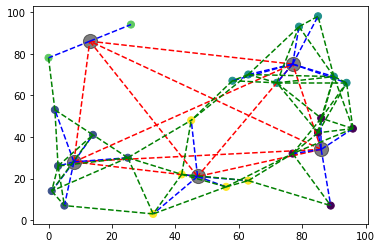

Packets:
c1e8e44d-ccec-4f6f-a957-5ced0beb6cfc (0.00816621499375314, 's2', 's10', 1)
93b92c1e-99d9-4584-a2a7-e5a057030fa9 (0.008721265396921751, 's0', 's2', 0)
57d1f59f-f5bf-486f-8985-861e5ac3d03a (0.018323623073106976, 's9', 's8', 1)
362d4f2f-44d7-412f-b201-b35617b94e45 (0.020425775047472783, 's1', 's2', 0)
862c94c0-6e2a-4085-bbcb-f6b3be2a82c1 (0.020939045166209258, 's11', 's1', 0)
e0fb3477-43cf-4471-8b1f-4bd1e461a365 (0.02703334580119998, 's6', 's22', 0)
c46e8fc2-0915-45ff-8d17-e01559d20c28 (0.04993523299737479, 's16', 's14', 0)
09417938-cbb2-4bd9-8127-8994c5f9c6f1 (0.05224456127699861, 's5', 's13', 0)
db81c436-0c61-4b90-ae42-1737066d4340 (0.05354054841104494, 's16', 's14', 0)
c494ff35-3407-4800-b0f6-e8f345f7e977 (0.08993721159369317, 's5', 's22', 0)
8a74b22e-2731-41aa-8c96-93ad523128fc (0.09311284283950627, 's18', 's15', 0)
192f4272-84bf-4675-85b9-a09528cdf87b (0.12000948033834247, 's2', 's8', 0)
d9c19bb9-47ee-4370-8e09-908b045c433a (0.12632677179583096, 's16', 's18', 0)
7cfebddc-adb

In [1]:

import random
import numpy as np
import matplotlib.pyplot as plt
import uuid
from sklearn.cluster import KMeans

parameters = {
    "station_num": 25,
    "center_num": 5,
    "packet_num": 1000,
}


def data_gen():
    # Generate Stations
    station_pos = []
    # properties are defined here: throughput/tick, time_delay, money_cost
    station_prop_candidates = [
        (10, 2, 0.5), (15, 2, 0.6), (20, 1, 0.8), (25, 1, 0.9)]
    station_prop = []
    for i in range(parameters["station_num"]):
        # Map size is defined here, which is 100*100
        station_pos.append((random.randint(0, 100), random.randint(0, 100)))
        station_prop.append(
            station_prop_candidates[random.randint(0, len(station_prop_candidates)-1)])
    # Output Stations
    print("Stations:")
    for i in range(len(station_pos)):
        print(f"s{i}", station_pos[i], station_prop[i])

    # Generate Centers by clustering
    kmeans = KMeans(n_clusters=parameters["center_num"])
    kmeans.fit(station_pos)
    station_labels = kmeans.predict(station_pos)
    center_pos = [(int(x[0]), int(x[1])) for x in kmeans.cluster_centers_]
    for i in range(len(center_pos)):
        while center_pos[i] in station_pos:
            # move slightly if center is overlapped with station
            # you can also use other methods to avoid this situation
            print("Warning: Center moved")
            center_pos[i] = center_pos[i][0] + 1, center_pos[i][1] + 1
    # properties are defined here: throughput/tick, time_delay, money_cost
    center_prop_candidates = [
        (100, 2, 0.5), (150, 2, 0.5), (125, 1, 0.5), (175, 1, 0.5)]
    center_prop = []
    for i in range(parameters["center_num"]):
        center_prop.append(
            center_prop_candidates[random.randint(0, len(center_prop_candidates)-1)])
    # Output Centers
    print("Centers:")
    for i in range(parameters["center_num"]):
        print(f"c{i}", center_pos[i], center_prop[i])

    # Draw Stations and Centers
    plt.scatter([x[0] for x in station_pos], [x[1]
                for x in station_pos], c=station_labels, s=50, cmap='viridis')
    plt.scatter([x[0] for x in center_pos], [x[1]
                for x in center_pos], c='black', s=200, alpha=0.5)

    # Generate Edges
    edges = []
    print("Edges (center to center):")      # Airlines
    for i in range(parameters["center_num"]):
        for j in range(parameters["center_num"]):
            if j > i:
                dist = np.linalg.norm(
                    np.array(center_pos[i]) - np.array(center_pos[j]))
                # src, dst, time_cost, money_cost
                # time_cost and money_cost are defined here
                edges.append((f"c{i}", f"c{j}", 0.25 * dist, 0.2 * dist))
                edges.append((f"c{j}", f"c{i}", 0.25 * dist, 0.2 * dist))
                plt.plot([center_pos[i][0], center_pos[j][0]], [
                         center_pos[i][1], center_pos[j][1]], 'r--')
                print(edges[-2])
                print(edges[-1])
    print("Edges (center to station):")     # Highways
    for i in range(parameters["center_num"]):
        for j in range(parameters["station_num"]):
            if station_labels[j] == i:
                dist = np.linalg.norm(
                    np.array(center_pos[i]) - np.array(station_pos[j]))
                # time_cost and money_cost are defined here
                edges.append((f"c{i}", f"s{j}", 0.6 * dist, 0.12 * dist))
                edges.append((f"s{j}", f"c{i}", 0.6 * dist, 0.12 * dist))
                plt.plot([center_pos[i][0], station_pos[j][0]], [
                         center_pos[i][1], station_pos[j][1]], 'b--')
                print(edges[-2])
                print(edges[-1])
    print("Edges (station to station):")    # Roads
    for i in range(parameters["station_num"]):
        for j in range(parameters["station_num"]):
            if i > j and (np.linalg.norm(np.array(station_pos[i]) - np.array(station_pos[j])) < 30):
                dist = np.linalg.norm(
                    np.array(station_pos[i]) - np.array(station_pos[j]))
                # time_cost and money_cost are defined here
                edges.append((f"s{i}", f"s{j}", 0.8 * dist, 0.07*dist))
                edges.append((f"s{j}", f"s{i}", 0.8 * dist, 0.07*dist))
                plt.plot([station_pos[i][0], station_pos[j][0]], [
                         station_pos[i][1], station_pos[j][1]], 'g--')
                print(edges[-2])
                print(edges[-1])
    plt.show()

    # Generate Packets
    packets = []
    src_prob = np.random.random(parameters["station_num"])
    src_prob = src_prob / np.sum(src_prob)
    dst_prob = np.random.random(parameters["station_num"])
    dst_prob = dst_prob / np.sum(dst_prob)
    # Package categories are defined here: 0 for Regular, 1 for Express
    speed_prob = [0.7, 0.3]
    print("Packets:")
    for i in range(parameters["packet_num"]):      # Number of packets
        src = np.random.choice(parameters["station_num"], p=src_prob)
        dst = np.random.choice(parameters["station_num"], p=dst_prob)
        while dst == src:
            dst = np.random.choice(parameters["station_num"], p=dst_prob)
        category = np.random.choice(2, p=speed_prob)
        # Create time of the package, during 12 time ticks(hours). Of course you can change it.
        create_time = np.random.random() * 12
        packets.append((create_time, f"s{src}", f"s{dst}", category))
    # Sort packets by create time
    packets.sort(key=lambda x: x[0])
    # Output Packets
    for packet in packets:
        print(uuid.uuid4(), packet)



    
    M=np.zeros((60,60))
    for i in range(60):
        for j in range(60):
            M[i][j]=np.Infinity
    for i in range(parameters["center_num"]):               #要处理的还有M[2*i][2*i+1]
        for j in range(parameters["center_num"]):
            if j > i:
                M[2*i+1][2*j] = 0.25*np.linalg.norm(
                    np.array(center_pos[i]) - np.array(center_pos[j]))
                M[2*j+1][2*i] = M[2*i+1][2*j]
    for i in range(parameters["center_num"]):
        for j in range(parameters["station_num"]):
            if station_labels[j] == i:
                M[2*i+1][2*j+10] = 0.6*np.linalg.norm(
                    np.array(center_pos[i]) - np.array(station_pos[j]))
                M[2*j+11][2*i] = M[2*i+1][2*j+10]
    for i in range(parameters["station_num"]):
        for j in range(parameters["station_num"]):
            if i > j and (np.linalg.norm(np.array(station_pos[i]) - np.array(station_pos[j])) < 30):
                M[2*i+11][2*j+10] = 0.8*np.linalg.norm(
                    np.array(station_pos[i]) - np.array(station_pos[j]))
                M[2*j+11][2*i+10]=M[2*i+11][2*j+10]
                
    
                    

    return {
        "station_pos": station_pos,
        "station_prop": station_prop,
        "center_pos": center_pos,
        "center_prop": center_prop,
        "edges": edges,
        "packets": packets,
        "matrice": M,
    }


if __name__ == '__main__':
    network_data = data_gen()



In [3]:

print(network_data["matrice"])

[[        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf 19.55760722 ...         inf  8.48528137
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 ...
 [ 4.83735465         inf         inf ...         inf  8.94427191
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [ 8.48528137         inf         inf ...         inf         inf
          inf]]


In [ ]:
for i in range(parameters["center_num"]):
    network_data["matrice"][2*i][2*i+1]=t/network_data["center_prop"][i][0]+network_data["center_prop"][i][1]+q #此处t为站点处已有的包裹数量，应为一个列表,q为包裹在路上这段时间时站点新进入的包
for i in range(parameters["station_num"]):
    network_data["matrice"][2*i+10][2*i+11]=t/network_data["station_prop"][i][0]+network_data["station_prop"][i][1]+q                                                               
                                                              
    

In [4]:
def bellman_ford(M,s0):
    n=len(M)#ordre du graphe
    Delta=[np. Infinity]*n#étape 1
    Chemins=[[]]*n# liste des listes des plus courts chemins
    Delta[s0]=0#étape 1
    Chemins[s0]=[s0] #plus court chemin de s0 à s0
    for k in range(n-1): #étape 2
        for i in range(n): #étape 3
            for j in range(n): #étape 3
                if M[ i ][ j]!=0 and Delta[ i]+M[ i ][ j]<Delta[ j ]: #ét. 4
                    Delta[ j]=Delta[ i]+M[ i ][ j ] #étape 4
                    Chemins[ j]=Chemins[ i ]+[j ] #chemin plus court
    return Delta,Chemins


In [26]:
bellman_ford(network_data["matrice"],30)

([inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  0,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [30],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []])

In [16]:
int(network_data["packets"][1][2][1])

2

In [46]:
def findshortestway(packet):
    if packet[1][0]=='s':
        if len(packet[1])==2:
           a=int(packet[1][1])*2+10
        else:
           a=int(packet[1][1:])*2+10
    else:
        a=int(packet[1][1])*2
    if packet[2][0]=='s':
        if len(packet[1])==2:
           b=int(packet[2][1])*2+10
        else:
           b=int(packet[2][1:])*2+10
    else:
        b=int(packet[2][1])*2
    c,d= bellman_ford(network_data["matrice"],a)
    return c[b]

In [37]:
network_data["packets"][4]
int(network_data["packets"][4][1][1:2])

1

In [47]:
findshortestway(network_data["packets"][4])

inf